<a href="https://colab.research.google.com/github/soeun727/AI-Project-Corona/blob/main/test1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 회귀분석 test
# https://zephyrus1111.tistory.com/52

In [ ]:
!git clone https://github.com/soeun727/AI-Project-Corona

Cloning into 'AI-Project-Corona'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
%cd /content/AI-Project-Corona

/content/AI-Project-Corona


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
#/content/AI-Project-Corona/dataset/toluca_company_dataset.csv
df = pd.read_csv('./dataset/toluca_company_dataset.csv') ## 데이터 불러오기

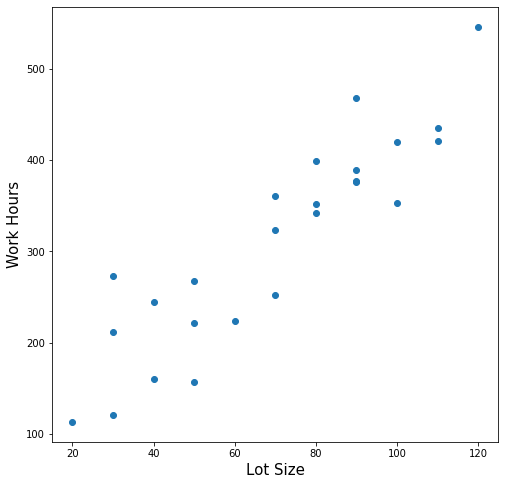

In [ ]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

In [ ]:
## states model 사용
fit = ols('Work_hours ~ Lot_size',data=df).fit() ## 단순선형회귀모형 적합


In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 29 May 2021   Prob (F-statistic):           4.45e-10
Time:                        16:40:24   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## states model 사용
fit = ols('Work_hours ~ Lot_size - 1',data=df).fit() ## 단순선형회귀모형 적합

In [ ]:
## 회귀 계수
#print(fit.params.Intercept) ## 절편
#print(fit.params.Lot_size) ## 기울기

## 추정값
fit.fittedvalues


0     346.973999
1     130.115249
2     216.858749
3     390.345748
4     303.602249
5     260.230499
6     520.460998
7     346.973999
8     433.717498
9     216.858749
10    173.486999
11    303.602249
12    390.345748
13     86.743500
14    477.089248
15    433.717498
16    130.115249
17    216.858749
18    390.345748
19    477.089248
20    130.115249
21    390.345748
22    173.486999
23    346.973999
24    303.602249
dtype: float64

In [ ]:
## 잔차
fit.resid


0      52.026001
1      -9.115249
2       4.141251
3     -14.345748
4      57.397751
5     -36.230499
6      25.539002
7       5.026001
8     -80.717498
9     -59.858749
10    -13.486999
11    -51.602249
12     -1.345748
13     26.256500
14    -42.089248
15    -13.717498
16     81.884751
17     51.141251
18    -13.345748
19    -56.089248
20    142.884751
21     77.654252
22     70.513001
23     -4.973999
24     19.397751
dtype: float64

In [ ]:
## 예측값
fit.predict(exog=dict(Lot_size=[40]))


0    173.486999
dtype: float64

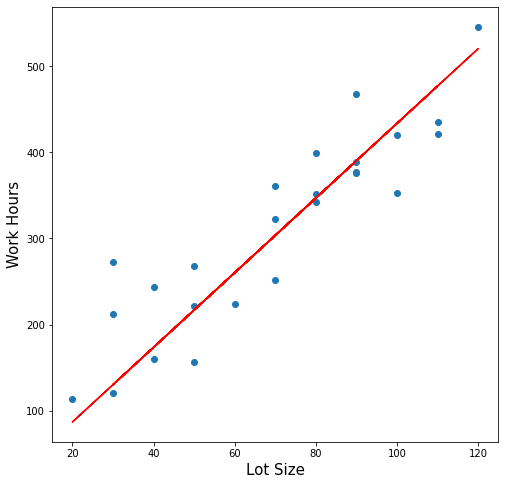

In [ ]:
## 시각화
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Lot_size'],df['Work_hours']) ## 원 데이터 산포도
plt.plot(df['Lot_size'],fit.fittedvalues,color='red') ## 회귀직선 추가
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Work Hours',fontsize=font_size)
plt.show()

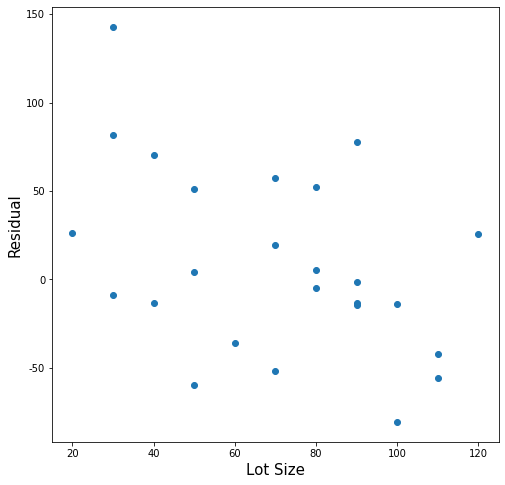

In [ ]:
## 잔차도 Residual Plot
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(df['Lot_size'],fit.resid) ## 잔차도 출력
 
plt.xlabel('Lot Size', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()

In [ ]:
# Scikit-learn을 이용하여 적합하기
## sklearn linear regression 사용
x = df['Lot_size'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = df['Work_hours']
 
fit = LinearRegression().fit(x,y) ## 단순선형회귀모형 적합

In [ ]:
## 회귀 계수
print(fit.intercept_) ## 절편
print(fit.coef_) ## 기울기

62.36585858585849
[3.57020202]


In [ ]:
## 추정값
fit.predict(x)

array([347.9820202 , 169.47191919, 240.8759596 , 383.6840404 ,
       312.28      , 276.5779798 , 490.79010101, 347.9820202 ,
       419.38606061, 240.8759596 , 205.17393939, 312.28      ,
       383.6840404 , 133.76989899, 455.08808081, 419.38606061,
       169.47191919, 240.8759596 , 383.6840404 , 455.08808081,
       169.47191919, 383.6840404 , 205.17393939, 347.9820202 ,
       312.28      ])

In [ ]:
## 잔차
residual = y - fit.predict(x)
print(residual)

0      51.017980
1     -48.471919
2     -19.875960
3      -7.684040
4      48.720000
5     -52.577980
6      55.209899
7       4.017980
8     -66.386061
9     -83.875960
10    -45.173939
11    -60.280000
12      5.315960
13    -20.769899
14    -20.088081
15      0.613939
16     42.528081
17     27.124040
18     -6.684040
19    -34.088081
20    103.528081
21     84.315960
22     38.826061
23     -5.982020
24     10.720000
Name: Work_hours, dtype: float64


In [ ]:
## 예측값
fit.predict([[80]])

array([347.9820202])

In [ ]:
# 예시코드에 따라 코로나 데이터셋에 적용해보기

In [ ]:
!git clone https://github.com/soeun727/AI-Project-Corona

fatal: destination path 'AI-Project-Corona' already exists and is not an empty directory.


In [ ]:
%cd /content/AI-Project-Corona

/content/AI-Project-Corona


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
# /content/AI-Project-Corona/AI-Project-Corona/dataset/ML_korea_covid_19_dataset.xlsx
df = pd.read_csv('./dataset/ML_korea_covid_19_dataset.xlsx') ## 데이터 불러오기